In [38]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])

In [39]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input 
    and returns the inputs and labels.
        
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X (numpy array): The input matrix.
    y (numpy array): The labels array.
    """
    
    X = dataset[:,0]
    X = X.reshape(-1,1)

    y = dataset[:,-1]
    
    # return the results as a tuple
    return X, y

def construct_design_matrix(matrix):
    design = np.array([[matrix[0][0],1],[matrix[1][0],1]])
    return design


# construct the design matrix    
X1, y1 = separate_inputs_labels(dataset_1)
X2, y2 = separate_inputs_labels(dataset_2)
X3, y3 = separate_inputs_labels(dataset_3)

X1_design = construct_design_matrix(X1)
X2_design = construct_design_matrix(X2)
X3_design = construct_design_matrix(X3)


# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)

X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10  1]
 [ 9  1]]


Inverse of Dataset 1: [[ 1. -1.]
 [-9. 10.]]
Weights for Dataset 1: [-4. 42.]
Weights for Dataset 2: [ 2. -9.]
Weights for Dataset 3: [ 1. -2.]


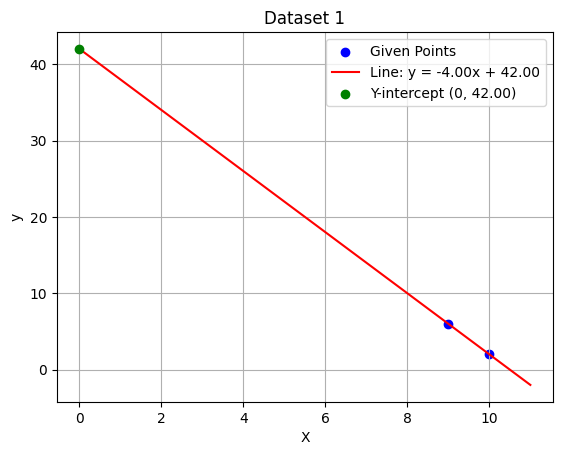

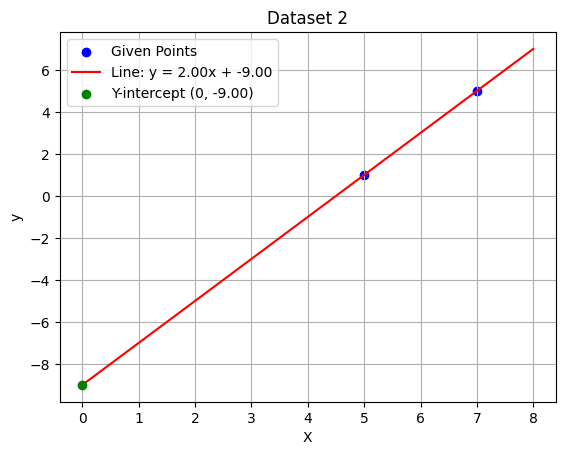

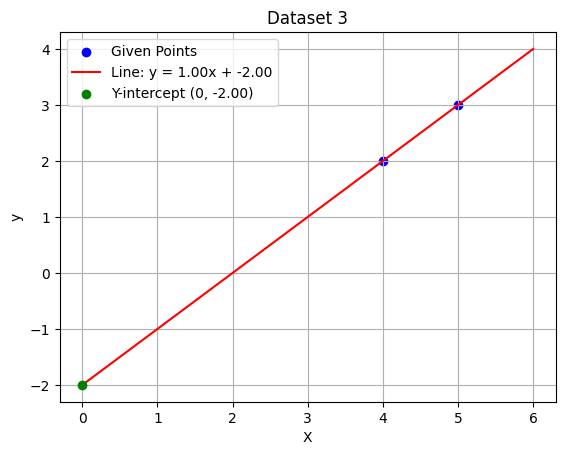

In [40]:
X1_design_inv = np.linalg.inv(X1_design)
X2_design_inv = np.linalg.inv(X2_design)
X3_design_inv = np.linalg.inv(X3_design)

print("Inverse of Dataset 1:", X1_design_inv)

# calc model weights

weights1 =  X1_design_inv @ y1
weights2 =  X2_design_inv @ y2
weights3 =  X3_design_inv @ y3

# plot the result

print("Weights for Dataset 1:", weights1)
print("Weights for Dataset 2:", weights2)
print("Weights for Dataset 3:", weights3)


# Function to plot data points and fitted line
def plot_model(X, y, weights, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals + weights[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {weights[0]:.2f}x + {weights[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[1], color='green', zorder=5, label=f'Y-intercept (0, {weights[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, weights1, 'Dataset 1')
plot_model(X2, y2, weights2, 'Dataset 2')
plot_model(X3, y3, weights3, 'Dataset 3')